<a href="https://colab.research.google.com/github/lucasquemelli/House_Rocket_Machine_Learning/blob/main/House_Rocket_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from scipy import stats
from matplotlib import pyplot as plt

# 1. Exploratory Data Analysis

In [2]:
url = 'https://raw.githubusercontent.com/lucasquemelli/House_Rocket/main/kc_house_data.csv'
data = pd.read_csv(url)

# 1.1 Data Description 

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
def data_shape(data):
    print("Shape of the dataset")
    print("\nNumber of rows: {}\nNumber of columns: {}".format(data.shape[0],data.shape[1]))
    
    return None

def num_attributes(data):
    num_attributes = len(data.columns) - 2
    print("\n\nThe number of attribute is:", num_attributes)
    
    return num_attributes

def attributes(data):
    attributes = data.drop(['id','date'], axis=1)
    print("\n\nThe attributes are:\n\n",attributes.columns.tolist())
    
    return attributes

def data_info(data):
    print("\n\nData types\n")
    data.info()
    
    return None

def descriptive_analysis(data):
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    print("\n\nDescriptive analysis:\n\n",data.describe().T)
    
    return None

def display(data):
    #Displaying unique values for the number of bedrooms, bathrooms, floors, waterfront, view, condition and grade
    print("\n\nAttributes unique values")
    print("\n\nUnique values for bedrooms:", np.sort(data['bedrooms'].unique())) 
    print("\nUnique values for bathrooms:", np.sort(data['bathrooms'].unique()))
    print("\nUnique values for floors:", np.sort(data['floors'].unique()))
    print("\nUnique values for waterfront:", np.sort(data['waterfront'].unique()))
    print("\nUnique values for view:", np.sort(data['view'].unique()))
    print("\nUnique values for condition:", np.sort(data['condition'].unique()))
    print("\nUnique values for grade:", np.sort(data['grade'].unique()))
    
    return None

if __name__ == '__main__':
    
    data_shape(data)
    
    num_attributes = num_attributes(data)
    
    attributes = attributes(data)
    
    data_info(data)
    
    descriptive_analysis(data)
    
    display(data)

Shape of the dataset

Number of rows: 21613
Number of columns: 21


The number of attribute is: 19


The attributes are:

 ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  in

**Meaning of the attributes**

- ID: identification number
- date: period in which the properties were available
- bedrooms: number of bedrooms
- bathrooms: number of bathrooms
- floors: number of floors
- waterfront: if some property has waterfront or not (0 or 1)
- view: number of views
- condition: condition of the properties (1 to 5)
- grade: quality of the building and construction level
- price: price of the property
- sqft_living: living room built area [ft²]
- sqft_lot: lot area [ft²]
- sqft_above: built area above ground level [ft²]
- sqft_basement: built basement area [ft²]
- yr_built: year that the property was built
- yr_renovated: year of renovation
- sqft_living15: average built area of the 15 nearest neighboring properties [ft²]
- sqft_lot15: average lot area of the 15 nearest neighboring properties [ft²]
- zipcode: number of zipcode
- lat: latitude identification number
- long: longitude identification number

# 1.2 Data Cleaning

In [5]:
def missing_values(data):
    print("Missing values\n")
    print(data.isna().sum())
    
    return None

def ids(data):
    ids = data['id']
    
    return ids

def duplicates_id(data):
    print("\n\nDuplicates\n")
    print(data[ids.isin(ids[ids.duplicated()])].sort_values('id'))
    
    return None

if __name__ == '__main__':
    
    missing_values(data)
    
    ids = ids(data)
    
    duplicates_id(data)

Missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Duplicates

               id             date     price  ...    long  sqft_living15  sqft_lot15
2497      1000102  20150422T000000 300000.00  ... -122.21           2060        7316
2496      1000102  20140916T000000 280000.00  ... -122.21           2060        7316
16814     7200179  20141016T000000 150000.00  ... -122.21           1480        6969
16815     7200179  20150424T000000 175000.00  ... -122.21           1480        6969
11434   109200390  20141020T000000 250000.00  ... -122.37           1830        6956
...           ...              ...       ...  ..

Duplicates (353) in this dataset are meant to be properties which were sold twice or more between 2014 and 2015. These properties were sold on different dates and at different prices. It means the price changes with time.

## 1.3. Data Conversion

In [6]:
data['date'] =  pd.to_datetime(data['date'])

## 1.4. Outliers

The chosen method to remove outliers was **visual method**. The choice was made based on the discussion in section 1.4.4 of [House Rocket - insight project.](https://github.com/lucasquemelli/House_Rocket/blob/main/house_rocket_insight.ipynb) For further details, access the link.

In [7]:
def drop_rows(data):
    data = data.drop(data[data['bathrooms'] == 0].index)
    
    return data

def reset_index(data):
    data = data.reset_index(drop=True)
    dataset = data.copy()
    
    return data, dataset

def show_dimensions(data):
    print(f"Clean dataset: {data.shape[0]} properties (rows), {data.shape[1]} features (columns).")
    
    return None

if __name__ == '__main__':
    
    data = drop_rows(data)
    
    data, dataset = reset_index(data)
    
    show_dimensions(data)

Clean dataset: 21603 properties (rows), 21 features (columns).


# 2. Feature Selection

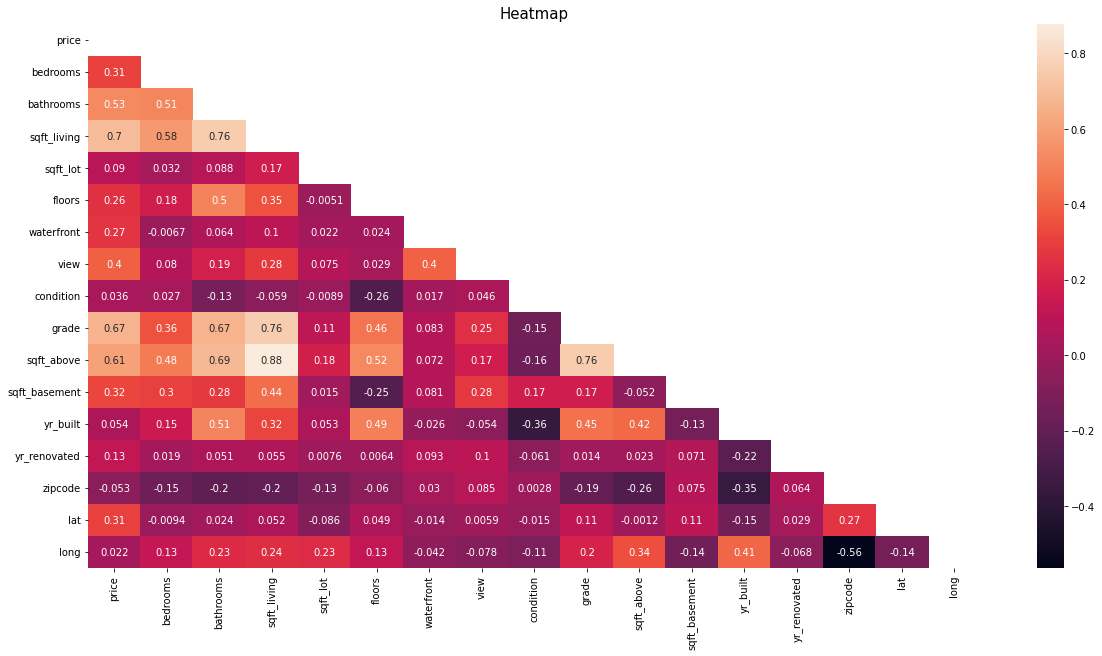

In [8]:
def data_copy(data):
    data_analysis = data.copy(deep=True)
    
    return data_analysis

def correlation_data(data_analysis):
    corr = data_analysis.drop(columns=['id', 'sqft_living15','sqft_lot15']).corr()
    
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    
    plt.figure(figsize=(20,10))
    ax = sns.heatmap(corr, mask = mask, annot = True)
    ax = plt.title("Heatmap", fontsize=15)
    ax = plt.xlabel("",fontsize=12)
    ax = plt.ylabel("",fontsize=12)
    
    return None

if __name__ == '__main__':
    data_analysis = data_copy(data)
    
    correlation_data(data_analysis)

From the heatmap above, the features which most correlate with the price of the properties are:

1. sqft_living: 0.70.
2. grade: 0.67.
3. sqft_above: 0.61.
4. bathrooms: 0.53.

The other features did not present significative correlation coefficient values.